In [1]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

# Define figure params
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [2]:
path = 'C:/Users/czlni/Desktop/'
df_Sklearn = pd.read_csv(path+'df_Sklearn.csv')
df_encode = pd.read_csv(path+'df_encode.csv')


Build random forest model on original price. 

In [3]:
Y=df_Sklearn['price']
X=df_Sklearn.drop(['price'],axis=1)

In [4]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=42)

print(f"No. of training examples: {x_train.shape[0]}")
print(f"No. of testing examples: {x_test.shape[0]}")

No. of training examples: 8000
No. of testing examples: 2000


Set up initial model:


In [5]:
from sklearn.ensemble import RandomForestRegressor

Min_samples_per_leaf = 10
Max_features = "log2" # "sqrt","log2", or int
Num_trees = 500
# create the model
model_rf = RandomForestRegressor(n_estimators=Num_trees, min_samples_leaf=Min_samples_per_leaf, max_features=Max_features, \
                                 bootstrap=True, oob_score=True, random_state=100)

# fitting the model
model_rf.fit(x_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=True, random_state=100, verbose=0,
                      warm_start=False)

In [6]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

# get original predictions
pred_train_rf= model_rf.predict(x_train)

print("Training Evaluation")
print("Mean Square Error",np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print("R2 Score",r2_score(y_train, pred_train_rf))

print("Testing Evaluation")
# testing predictions
pred_test_rf = model_rf.predict(x_test)
print("Mean Square Error",np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print("R2 Score",r2_score(y_test, pred_test_rf))

Training Evaluation
Mean Square Error 179.6632352274384
R2 Score 0.5306453184110184
Testing Evaluation
Mean Square Error 255.31401554968292
R2 Score 0.40498065802997874


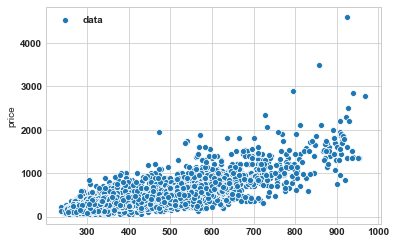

In [7]:
sns.scatterplot(x=pred_train_rf,
                y=y_train,
                label='data')
#plt.legend()

In traning set, the scatter plot predicted value vs actual value shows that the model still overall underpredicts but the performance is much better than the performance of multiregression model. 

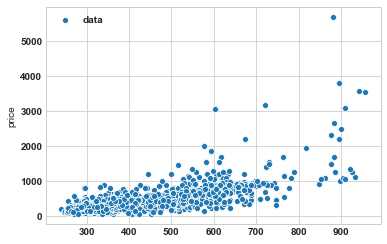

In [8]:
sns.scatterplot(x=pred_test_rf,
                y=y_test,
                label='data')
#plt.legend()

In test set, the scatter plot predicted value vs actual value shows the same thing as in sample test that the model mostly underpredicts the price. 

Therefore, log transformation of price is consider. 